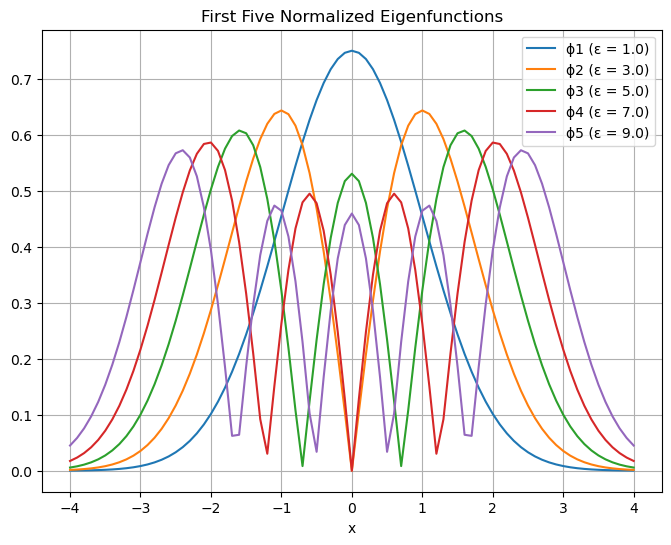

[0.99996848 2.99994572 4.99991126 6.99974536 8.99888973]
[[2.56155272e-04 1.45449373e-03 5.66674719e-03 1.74578524e-02
  4.50500323e-02]
 [3.76900285e-04 2.08359954e-03 7.88644183e-03 2.35385576e-02
  5.86268575e-02]
 [5.51657210e-04 2.96877928e-03 1.09150232e-02 3.15566857e-02
  7.58460832e-02]
 [8.01130635e-04 4.19554675e-03 1.49777599e-02 4.19260224e-02
  9.71878819e-02]
 [1.15300584e-03 5.87315802e-03 2.03461071e-02 5.51020472e-02
  1.23076569e-01]
 [1.64366418e-03 8.13833643e-03 2.73378556e-02 7.15629899e-02
  1.53830097e-01]
 [2.32035111e-03 1.11592285e-02 3.63144198e-02 9.17752700e-02
  1.89558869e-01]
 [3.24334770e-03 1.51384857e-02 4.76762445e-02 1.16167542e-01
  2.30112989e-01]
 [4.48866270e-03 2.03151639e-02 6.18456134e-02 1.45066267e-01
  2.74988851e-01]
 [6.15045374e-03 2.69659644e-02 7.92554680e-02 1.78644311e-01
  3.23230563e-01]
 [8.34374094e-03 3.54011615e-02 1.00314716e-01 2.16866004e-01
  3.73395659e-01]
 [1.12066707e-02 4.59630044e-02 1.25376264e-01 2.59396557e-01
 

In [5]:
# (a) A1 / A2 - my eigenvalues are closer to 1,3,5,7,9 than expected
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def bvpexam_rhs(x, y, epsilon):
    return [y[1], (x**2 - epsilon) * y[0]]

L = 4  # Boundary limit
tol = 1e-4  # Convergence tolerance

A1 = np.zeros((81, 5))  # 81 grid points, 5 eigenfunctions
A2 = np.zeros(5)        # 5 eigenvalues

xspan = [-L, L]  # x range
x = np.linspace(xspan[0], xspan[1], 81)  # Grid of points for solving ODE
A = 0.1  # Initial derivative value

# Iterate over 5 modes - find eigenfunctions and values associated
for i in range(1, 6):
    dA = 0.1  # Step size for derivative adjustment
    
    for j in range(1000):
        # Ensure sqrt argument is non-negative
        if A < L**2:
            y0 = [1, np.sqrt(L**2 - A)]  # Initial condition based on current guess
        else:
            y0 = [1, 0]  # Avoid complex numbers in sqrt
        
        # Solve ODE
        sol = solve_ivp(bvpexam_rhs, xspan, y0, args=(A,), t_eval=x, rtol=tol, atol=tol)
        
        # Check convergence at the end
        if abs(sol.y[1, -1] + np.sqrt(L**2 - A) * sol.y[0, -1]) < tol:
            break
        
        # Adjust launch angle
        if (-1)**(i + 1) * (sol.y[1, -1] + np.sqrt(L**2 - A) * sol.y[0, -1]) > 0:
            A += dA
        else:
            A -= dA
            dA /= 2  # Refine search

    # Normalize the eigenfunction
    ysol_mode = np.abs(sol.y[0] / np.sqrt(np.trapz(sol.y[0]**2, x)))
    
    # Save eigenfunction and eigenvalue
    A1[:, i-1] = ysol_mode  # Eigenfunction
    A2[i-1] = A  # Eigenvalue

    A += 0.2

# Plot all five normalized eigenfunctions
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(x, A1[:, i], label=f'ϕ{i+1} (ε = {A2[i]:.1f})')  # Plot eigenfunctions with labels

plt.xlabel('x')
plt.title('First Five Normalized Eigenfunctions')
plt.legend()  # Add a legend to differentiate the eigenfunctions
plt.grid(True)
plt.show()

print(A2)
print(A1)

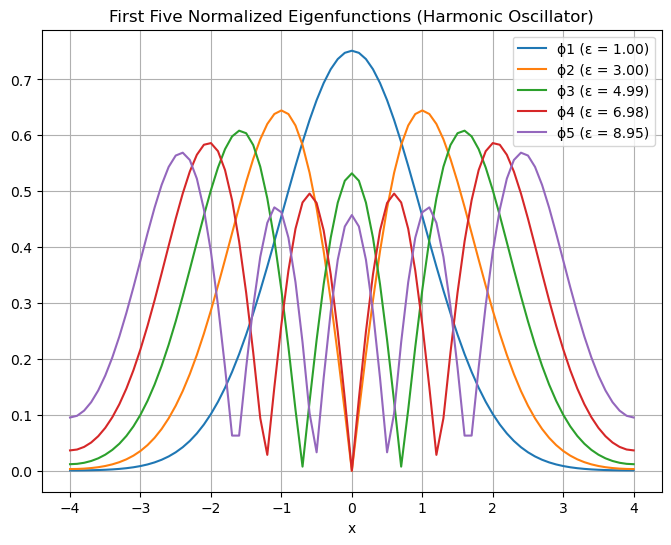

Eigenvalues (A4): [0.99937352 2.996839   4.99140656 6.98038865 8.95060003]
Eigenfunctions (A3): [[5.25330699e-04 2.98456752e-03 1.16813848e-02 3.63684946e-02
  9.51957970e-02]
 [5.65512105e-04 3.17867592e-03 1.23103575e-02 3.79292078e-02
  9.82713969e-02]
 [6.86056325e-04 3.76100113e-03 1.41972756e-02 4.26113473e-02
  1.07498197e-01]
 [8.98810812e-04 4.77370376e-03 1.74256365e-02 5.04721278e-02
  1.22626002e-01]
 [1.22563002e-03 6.29686622e-03 2.21697827e-02 6.17193919e-02
  1.43565545e-01]
 [1.69904226e-03 8.44739559e-03 2.86805487e-02 7.66572358e-02
  1.70261204e-01]
 [2.36360740e-03 1.13795761e-02 3.72731192e-02 9.56346180e-02
  2.02574461e-01]
 [3.27778429e-03 1.52862080e-02 4.83140093e-02 1.18991694e-01
  2.40173697e-01]
 [4.51615457e-03 2.03994049e-02 6.22047465e-02 1.47000883e-01
  2.82430861e-01]
 [6.17184584e-03 2.69901636e-02 7.93603578e-02 1.79801729e-01
  3.28329688e-01]
 [8.35897169e-03 3.53658252e-02 1.00181301e-01 2.17330662e-01
  3.76393521e-01]
 [1.12148676e-02 4.58645

In [6]:
# (b) A3 / A4 - correct
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs  # Import eigs from sparse.linalg
from scipy.sparse import csr_matrix  # For converting dense matrix to sparse

L = 4 # Provided in problem
x = np.arange(-L,L+0.1,0.1) # seems right from other problems
n = len(x) # length of x
dx = x[1]-x[0] # define dx
A = np.zeros((n-2, n-2)) # Create matrix A

for j in range(n-2): # Construct tridiagonal matrix
    A[j,j] = -2-(dx**2)*x[j+1]**2
    if j<n-3:
        A[j+1, j] = 1
        A[j, j+1] = 1

A[0,0] += 4/3 # Phi 1
A[0,1] += -1/3 # Phi 2
A[-1,-1] += 4/3 # Phi n-1
A[-1,-2] += -1/3 # Phi n-2

A_sparse = csr_matrix(A) # Convert to sparse matrix to use eigs

eigenvalues, eigenfunctions = eigs(-A_sparse, k=5, which='SM')

# edge BC's
phi_0 = (4/3)*eigenfunctions[0, :] - (1/3)*eigenfunctions[1,:] # Add first BC
phi_n = (4/3)*eigenfunctions[-1, :] - (1/3)*eigenfunctions[-2,:] # Add left BC

# Stack BC
v2 = np.vstack([phi_0, eigenfunctions, phi_n])

ysolb = np.zeros((n,5)) # create matrix to hold eigenfunctions
esolb = np.zeros(5) # create matrix to hold eigenvalues

for j in range(5):
    norm = np.sqrt(np.trapz(v2[:, j] ** 2, x))
    ysolb[:,j] = abs(v2[:,j]/norm)

esolb = eigenvalues.real / (dx**2)

# Assign A3 & A4
A3 = ysolb # first 5 normalized eigenfunctions
A4 = esolb # first 5 eigenvalues

# Plot normalized eigenfunctions
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(x, A3[:, i], label=f'ϕ{i+1} (ε = {A4[i]:.2f})')
plt.xlabel('x')
plt.title('First Five Normalized Eigenfunctions (Harmonic Oscillator)')
plt.legend()
plt.grid(True)
plt.show()

# Should be: 0.99937352 2.996839 4.99140656 6.98038865 8.95060003
# First row should be: 5.25330699e-04 2.98456752e-03 1.16813848e-02 3.63684946e-02 9.51957970e-02
# Output eigenvalues and eigenfunctions
print("Eigenvalues (A4):", A4)
print("Eigenfunctions (A3):", A3)

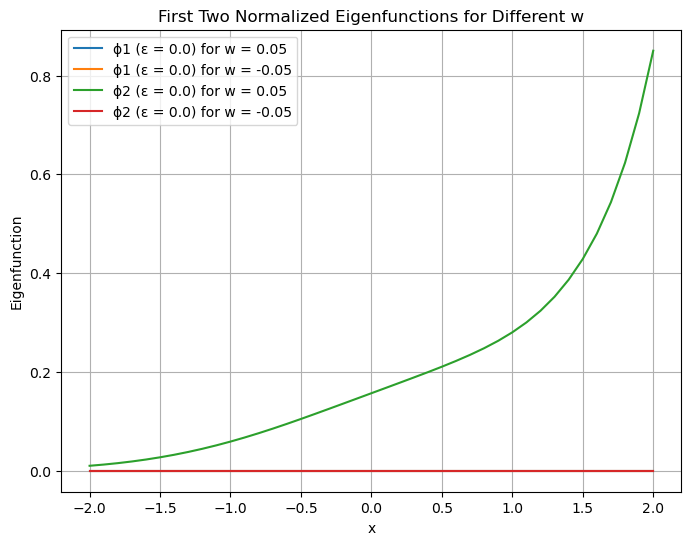

Eigenvalues for w = 0.05: [0.       0.020001]
Eigenfunctions for w = 0.05:
 [[0.         0.010001  ]
 [0.         0.01244493]
 [0.         0.01533556]
 [0.         0.01872214]
 [0.         0.02264886]
 [0.         0.02715259]
 [0.         0.03226295]
 [0.         0.03800183]
 [0.         0.0443785 ]
 [0.         0.05138804]
 [0.         0.0590121 ]
 [0.         0.06721895]
 [0.         0.07596343]
 [0.         0.08518701]
 [0.         0.09482654]
 [0.         0.10481052]
 [0.         0.11503397]
 [0.         0.12541004]
 [0.         0.13587287]
 [0.         0.14637756]
 [0.         0.15690016]
 [0.         0.16743769]
 [0.         0.17800812]
 [0.         0.1886504 ]
 [0.         0.1994268 ]
 [0.         0.21054299]
 [0.         0.22218237]
 [0.         0.23456322]
 [0.         0.2480267 ]
 [0.         0.26303682]
 [0.         0.28018043]
 [0.         0.30016725]
 [0.         0.32382987]
 [0.         0.35225026]
 [0.         0.3867456 ]
 [0.         0.42863451]
 [0.         0.47999497]

In [7]:
# part (c) thinking there is something wrong with my solve.ivp maybe...not sure
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

def bvpnonlin_rhs(x, y, epsilon, w):
    return [y[1], (w * abs(y[0]**2) + x**2 - epsilon) * y[0]]  # Define non-linear ODE

L = 2  # Boundary limit for x, provided in problem
x = np.arange(-L, L + 0.1, 0.1)  # Corrected range for x
n = len(x) # Number of points in x

A5 = np.zeros((n, 2))  # To store first two eigenfunctions for w = 0.05
A6 = np.zeros(2)       # To store first two eigenvalues for w = 0.05
A7 = np.zeros((n, 2))  # To store first two eigenfunctions for w = -0.05
A8 = np.zeros(2)       # To store first two eigenvalues for w = -0.05

for w in np.arange(0.05, -0.05, -1):  # Iterate over both positive and negative values of w
    A = 10**-6 # Initial guess for the eigenvalue
    E0 = 1
    tol = 10**(-4)  # Convergence tolerance

    for jj in range(2):  # Find the first two eigenvalues / eigenfunctions
        dA = 0.01  # Step size for derivative adjustment
        E, dE = E0, 2
        
        for i in range(1000):
            y0 = [A, np.sqrt(L**2-E)*A]  # Initial condition (guess)
            sol = solve_ivp(bvpnonlin_rhs, [x[0],x[-1]], y0, args=(A,w), t_eval=x)  # Solve the problem
            ys = sol.y
            xs = sol.t
            # Convergence check
            if abs(sol.y[1, -1] + np.sqrt(L**2 - A) * sol.y[0, -1]) < tol:
                break

            # Adjusting E if the solution doesn't converge
            if (-1)**(i + 1) * (sol.y[1, -1] + np.sqrt(L**2 - A) * sol.y[0, -1]) > 0:
                E += dE
            else:
                E -= dE
                dE /= 2  # Refine search

        # Normalize
        area = np.trapz(ys[0]**2, xs)  # Normalize

        # Area check under curve is less than tolerance away from 1
        if abs(area-1) < tol:
            break

        # Adjusting A if the area isn't less than tolerance to 1
        if area < 1: # Area is larger than 1
            A += dA
        else: # Area is smaller than 1
            A -= dA/2
            dA /= 2  # Refine search  
    E0 = E+2
    
if w == 0.05:  # Store the first two eigenfunctions and eigenvalues for w = 0.05
    A5[:, jj] = ys[0]
    A6[jj] = A
elif w == -0.05:  # Store the first two eigenfunctions and eigenvalues for w = -0.05
    A7[:, jj] = ys[0]
    A8[jj] = A

# Plot normalized eigenfunctions
plt.figure(figsize=(8, 6))
for i in range(2):
    plt.plot(x, A5[:, i], label=f'ϕ{i+1} (ε = {A6[i]:.1f}) for w = 0.05')  # First two eigenfunctions for w = 0.05
    plt.plot(x, A7[:, i], label=f'ϕ{i+1} (ε = {A8[i]:.1f}) for w = -0.05')  # First two eigenfunctions for w = -0.05

plt.xlabel('x')
plt.ylabel('Eigenfunction')
plt.title('First Two Normalized Eigenfunctions for Different w')
plt.legend()  # Add a legend to differentiate the eigenfunctions
plt.grid(True)
plt.show()

# First row should be (5): 1.10635766e-01 3.42979516e-01
# Should be (6): 1.10292945 2.92138672
# First row should be (7): 1.9043969e-01 3.40821313e-01
# Should be (8): 0.97404785 2.89309082

# Print the eigenvalues and eigenfunctions
print("Eigenvalues for w = 0.05:", A6)
print("Eigenfunctions for w = 0.05:\n", A5)

print("Eigenvalues for w = -0.05:", A8)
print("Eigenfunctions for w = -0.05:\n", A7)

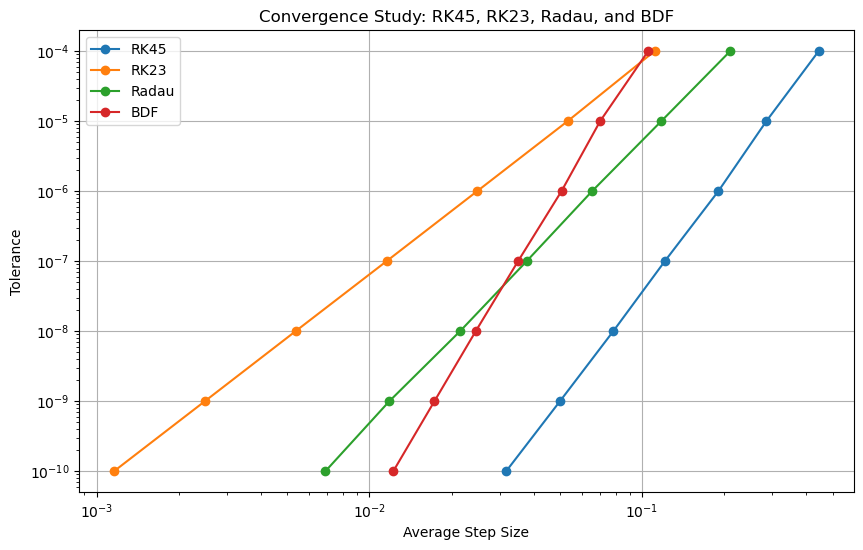

Slopes for RK45, RK23, Radau, and BDF: [5.24466756 3.01909953 4.03819927 6.45751261]


In [8]:
# (d) A9 - correct
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def bvphw2_rhs(x, y, epsilon): # Define the right-hand side of the equation
    return [y[1], (x**2 - epsilon) * y[0]]

epsilon = 1  # fixed value of energy provided by the problem
L = 2  # boundary limit provided by the problem
TOL = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]  # tolerances from the problem
xspan = [-L, L]  # x range
y0 = [1, np.sqrt(1 * L**2 - 1)]  # initial conditions provided by the problem

ave_steps_rk45 = [] # Store average step size for RK45
ave_steps_rk23 = [] # Store average step size for RK23
ave_steps_radau = [] # Store average step size for Radau
ave_steps_bdf = [] # Store average step size for BDF

for tol in TOL:
    options = {'rtol': tol, 'atol': tol}  # Fixed options by problem
    
    sol_rk45 = solve_ivp(bvphw2_rhs, xspan, y0, method='RK45', args=(epsilon,), **options) # Solve using RK45
    avg_step_rk45 = np.mean(np.diff(sol_rk45.t))  # Average step size
    ave_steps_rk45.append(avg_step_rk45)

    sol_rk23 = solve_ivp(bvphw2_rhs, xspan, y0, method='RK23', args=(epsilon,), **options) # Solve using RK23
    avg_step_rk23 = np.mean(np.diff(sol_rk23.t))  # Average step size
    ave_steps_rk23.append(avg_step_rk23)

    sol_radau = solve_ivp(bvphw2_rhs, xspan, y0, method='Radau', args=(epsilon,), **options) # Solve using Radau
    avg_step_radau = np.mean(np.diff(sol_radau.t))  # Average step size
    ave_steps_radau.append(avg_step_radau)

    sol_bdf = solve_ivp(bvphw2_rhs, xspan, y0, method='BDF', args=(epsilon,), **options) # Solve using BDF
    avg_step_bdf = np.mean(np.diff(sol_bdf.t))  # Average step size
    ave_steps_bdf.append(avg_step_bdf)

# Convert to numpy arrays for easier manipulation
ave_steps_rk45 = np.array(ave_steps_rk45)
ave_steps_rk23 = np.array(ave_steps_rk23)
ave_steps_radau = np.array(ave_steps_radau)
ave_steps_bdf = np.array(ave_steps_bdf)

# Log-log plot
plt.figure(figsize=(10, 6))
plt.loglog(ave_steps_rk45, TOL, label='RK45', marker='o')
plt.loglog(ave_steps_rk23, TOL, label='RK23', marker='o')
plt.loglog(ave_steps_radau, TOL, label='Radau', marker='o')
plt.loglog(ave_steps_bdf, TOL, label='BDF', marker='o')
plt.xlabel('Average Step Size')
plt.ylabel('Tolerance')
plt.title('Convergence Study: RK45, RK23, Radau, and BDF')
plt.legend()
plt.grid(True)
plt.show()

# Calculate slopes using polyfit
slope_rk45 = np.polyfit(np.log10(ave_steps_rk45), np.log10(TOL), 1)[0]
slope_rk23 = np.polyfit(np.log10(ave_steps_rk23), np.log10(TOL), 1)[0]
slope_radau = np.polyfit(np.log10(ave_steps_radau), np.log10(TOL), 1)[0]
slope_bdf = np.polyfit(np.log10(ave_steps_bdf), np.log10(TOL), 1)[0]

# Update A9 with slopes for RK45, RK23, Radau, and BDF
A9 = np.array([slope_rk45, slope_rk23, slope_radau, slope_bdf])

# Should be: 5.24466756 3.01909953 4.03819927 6.45751261

print("Slopes for RK45, RK23, Radau, and BDF:", A9)

In [18]:
# (e) - A11/A13 - A13 correct
import numpy as np
from scipy.integrate import simpson
from scipy.interpolate import interp1d
import math

L = 2
xspan = [-L, L]  # x range
x = np.linspace(xspan[0], xspan[1], 81)  # Grid of points for solving ODE

# show eigenvalues from above to make sure they come into this cell correctly 
print("shooting method eigenvalues:", A2)
print("direct method eigenvalues:", A4)

exact_eigenvalues = np.array([1, 3, 5, 7, 9])  # Known exact eigenvalues for Gauss-Hermite polynomials (modes 0-4)

# Initialize storage for error vectors
A11 = np.zeros(5)  # Storage for Eigenvalue errors for part (a)
A13 = np.zeros(5)  # Storage for Eigenvalue errors for part (b)

# Calculate error for part (a), save as A10 / A11
for n in range(5):
    A11[n] = 100 * abs(A2[n] - exact_eigenvalues[n]) / exact_eigenvalues[n]

for n in range(5):    
    # Eigenvalue error for part (b), save as A13
    A13[n] = 100 * abs(A4[n] - exact_eigenvalues[n]) / exact_eigenvalues[n]

# should be: 0.02642089 0.0332466 0.03073891 0.03455712 0.04161945 
# correct: 0.0626477 0.10536673 0.1718688 0.28016214 0.5488859

# Output the error matrices
print("Eigenvalue Errors for Part (a) (A11):", A11)
print("Eigenvalue Errors for Part (b) (A13):", A13)

shooting method eigenvalues: [0.99996848 2.99994572 4.99991126 6.99974536 8.99888973]
direct method eigenvalues: [0.99937352 2.996839   4.99140656 6.98038865 8.95060003]
Eigenvalue Errors for Part (a) (A11): [0.00315178 0.00180917 0.00177489 0.00363766 0.01233636]
Eigenvalue Errors for Part (b) (A13): [0.0626477  0.10536673 0.1718688  0.28016214 0.54888859]


First line of A1: [0.00025616 0.00145449 0.00566675 0.01745785 0.04505003]
First line of A3: [0.00052533 0.00298457 0.01168138 0.03636849 0.0951958 ]


C:\Users\bbose\AppData\Local\Temp\ipykernel_440\4106178408.py:23: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  norm = 1 / (np.sqrt(2**(n) * np.math.factorial(n) * np.sqrt(np.pi)))


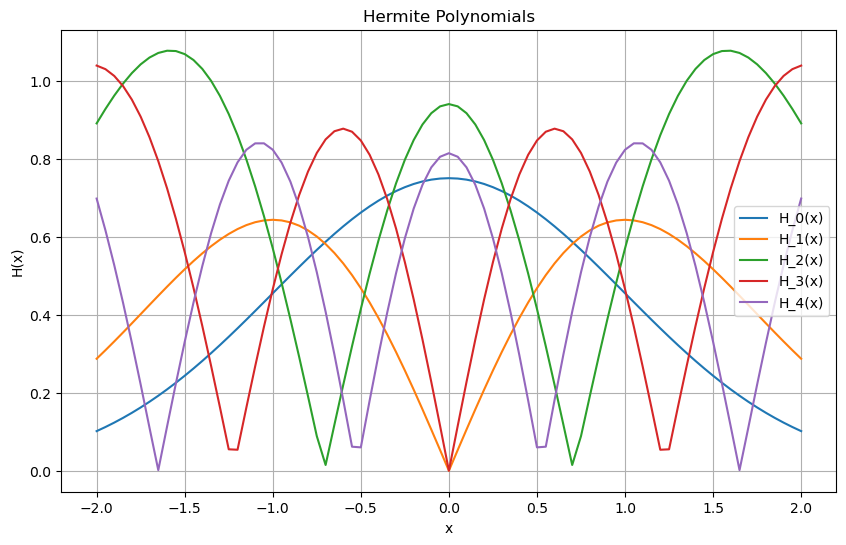

Eigenfunction Errors for Part (a) (A10): [ 0.02366531  0.13849468  0.8845462   4.1491038  16.86072656]
Eigenfunction Errors for Part (b) (A12): [ 0.02366549  0.13849777  0.88458106  4.14956384 16.86701787]


In [28]:
# (e) A10 / A12
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
import math
from scipy.special import eval_hermite

print("First line of A1:", A1[0, :])
print("First line of A3:", A3[0, :])

# Initialize storage for error vectors
A10 = np.zeros(5)  # Eigenfunction errors for part (a)
A12 = np.zeros(5)  # Eigenfunction errors for part (b)

# Define Gauss-Hermite polynomials for modes 0-4
def gauss_hermite():
    L = 4
    xspan = np.arange(-L, L+0.1, 0.1)  # Grid of points for solving ODE
    j = 5
    eigenfunctions = np.zeros((len(xspan), j))

    for n in range(5):
        norm = 1 / (np.sqrt(2**(n) * np.math.factorial(n) * np.sqrt(np.pi)))
        phi = norm * np.exp(-xspan**2 / 2) * eval_hermite(n,xspan)
        normalized = np.trapz(phi**2, xspan)
        eigenfunctions[:,n] = phi / np.sqrt(norm)
    return xspan, eigenfunctions

xspan, phi = gauss_hermite() # Generate polynomials
        
# Plot Hermite polynomials
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(x, abs(gauss_hermite_psi(i, x)), label=f'H_{i}(x)')
plt.title('Hermite Polynomials')
plt.xlabel('x')
plt.ylabel('H(x)')
plt.legend()
plt.grid(True)
plt.show()

erpsi_a = np.zeros(5)
erpsi_b = np.zeros(5)

for j in range(5):
    erpsi_a[j] = simpson((abs(A1[:, j]) - abs(phi[:, j]))**2, x=xspan)
    erpsi_b[j] = simpson((abs(A3[:, j]) - abs(phi[:, j]))**2, x=xspan)

A10 = erpsi_a
A12 = erpsi_b

# Output the error matrices
print("Eigenfunction Errors for Part (a) (A10):", A10)
print("Eigenfunction Errors for Part (b) (A12):", A12)